UAS Deep Learning No. 1

Nama: Janice Ashley Kurniawan

NIM: 2602203794

# 1A Data Exploration, Data Preprocessing, Data Splitting

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
# unzip data
!unzip DatasetStockB.zip

Archive:  DatasetStockB.zip
  inflating: CSCO.csv                
  inflating: AMZN.csv                


In [3]:
# read data
amzn = pd.read_csv('AMZN.csv')
csco = pd.read_csv('CSCO.csv')

In [4]:
# show head data
print('AMZN Data\n')
print(amzn.head())
print()
print('CSCO Data\n')
print(csco.head())

AMZN Data

         Date      Open      High       Low     Close  Adj Close    Volume
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200

CSCO Data

         Date  Open      High       Low     Close  Adj Close     Volume
0  1990-02-16   0.0  0.079861  0.073785  0.077257   0.059806  940636800
1  1990-02-20   0.0  0.079861  0.074653  0.079861   0.061822  151862400
2  1990-02-21   0.0  0.078993  0.075521  0.078125   0.060478   70531200
3  1990-02-22   0.0  0.081597  0.078993  0.078993   0.061150   45216000
4  1990-02-23   0.0  0.079861  0.078125  0.078559   0.060814   44697600


In [5]:
# data info
print('AMZN Information\n')
amzn.info()
print()
print('CSCO Information\n')
csco.info()

AMZN Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5758 entries, 0 to 5757
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5758 non-null   object 
 1   Open       5758 non-null   float64
 2   High       5758 non-null   float64
 3   Low        5758 non-null   float64
 4   Close      5758 non-null   float64
 5   Adj Close  5758 non-null   float64
 6   Volume     5758 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 315.0+ KB

CSCO Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7589 entries, 0 to 7588
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7589 non-null   object 
 1   Open       7589 non-null   float64
 2   High       7589 non-null   float64
 3   Low        7589 non-null   float64
 4   Close      7589 non-null   float64
 5   Adj Close  7589 non-null   float64
 6   Vo

In [6]:
# data describe
print('AMZN Describe\n')
print(amzn.describe())
print()
print('CSCO Describe\n')
print(csco.describe())

AMZN Describe

              Open         High          Low        Close    Adj Close  \
count  5758.000000  5758.000000  5758.000000  5758.000000  5758.000000   
mean    340.458153   344.156408   336.344390   340.417580   340.417580   
std     523.365374   528.138556   517.726971   523.140207   523.140207   
min       1.406250     1.447917     1.312500     1.395833     1.395833   
25%      37.460001    38.334999    36.812499    37.562500    37.562500   
50%      81.965000    83.520000    79.875000    81.599998    81.599998   
75%     335.267494   337.537491   331.727501   334.290001   334.290001   
max    2173.070068  2185.949951  2161.120117  2170.219971  2170.219971   

             Volume  
count  5.758000e+03  
mean   7.556094e+06  
std    7.325904e+06  
min    4.872000e+05  
25%    3.685525e+06  
50%    5.692450e+06  
75%    8.594350e+06  
max    1.043292e+08  

CSCO Describe

              Open         High          Low        Close    Adj Close  \
count  7589.000000  7589.00000

In [7]:
# data shape
print('AMZN Shape:', amzn.shape)
# print(amzn.shape)
print()
print('CSCO Shape:', csco.shape)
# print(csco.shape)

AMZN Shape: (5758, 7)

CSCO Shape: (7589, 7)


In [8]:
# mengonversi kolom 'Date' ke tipe datetime
amzn['Date'] = pd.to_datetime(amzn['Date'])
csco['Date'] = pd.to_datetime(csco['Date'])

# menetapkan kolom 'Date' sebagai index
amzn.set_index('Date', inplace=True)
csco.set_index('Date', inplace=True)

In [9]:
# checking missing values
print('AMZN Missing Values\n')
print(amzn.isna().sum())
print()
print('CSCO Missing Values\n')
print(csco.isna().sum())

AMZN Missing Values

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

CSCO Missing Values

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [10]:
# checking duplicate rows
print('AMZN Duplicate Rows:', amzn.duplicated().sum())
# print(amzn.duplicated().sum())
print()
print('CSCO Duplicate Rows:', csco.duplicated().sum())
# print(csco.duplicated().sum())

AMZN Duplicate Rows: 0

CSCO Duplicate Rows: 0


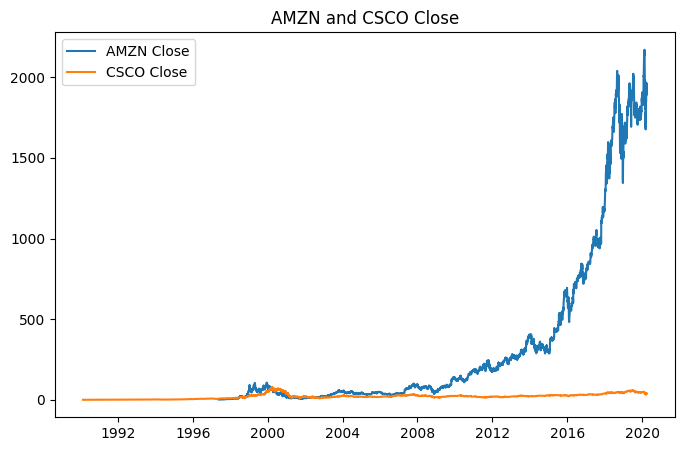

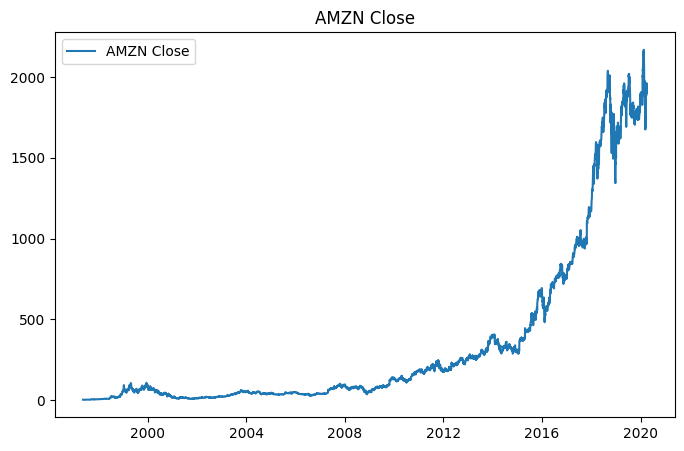

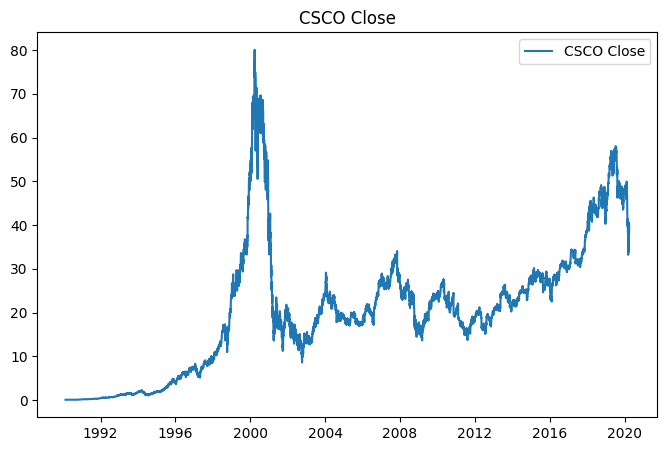

In [11]:
# eksplorasi data dengan plot

plt.figure(figsize=(8,5))
plt.plot(amzn['Close'], label='AMZN Close')
plt.plot(csco['Close'], label='CSCO Close')
plt.title('AMZN and CSCO Close')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(amzn['Close'], label='AMZN Close')
plt.title('AMZN Close')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(csco['Close'], label='CSCO Close')
plt.title('CSCO Close')
plt.legend()
plt.show()

In [12]:
# data splitting menjadi train (80%), val (10%), test (10%)
def split_data(data, train_ratio=0.8, val_ratio=0.1):
    train_size = int(train_ratio * len(data))
    val_size = int(val_ratio * len(data))
    train = data[:train_size]
    val = data[train_size:train_size+val_size]
    test = data[train_size+val_size:]
    return train, val, test

amzn_train, amzn_val, amzn_test = split_data(amzn)
csco_train, csco_val, csco_test = split_data(csco)

print(f'AMZN total samples: {len(amzn)}')
print(f'AMZN samples for training: {len(amzn_train)}')
print(f'AMZN samples for validation: {len(amzn_val)}')
print(f'AMZN samples for testing: {len(amzn_test)}')
print()
print(f'CSCO total samples: {len(csco)}')
print(f'CSCO samples for training: {len(csco_train)}')
print(f'CSCO samples for validation: {len(csco_val)}')
print(f'CSCO samples for testing: {len(csco_test)}')

AMZN total samples: 5758
AMZN samples for training: 4606
AMZN samples for validation: 575
AMZN samples for testing: 577

CSCO total samples: 7589
CSCO samples for training: 6071
CSCO samples for validation: 758
CSCO samples for testing: 760


In [13]:
# normalisasi data
# fit scaler pada train set dan transformasi semua set

scaler = MinMaxScaler()

amzn_train_scaled = scaler.fit_transform(amzn_train[['Close']])
csco_train_scaled = scaler.fit_transform(csco_train[['Close']])

amzn_val_scaled = scaler.transform(amzn_val[['Close']])
amzn_test_scaled = scaler.transform(amzn_test[['Close']])
csco_val_scaled = scaler.transform(csco_val[['Close']])
csco_test_scaled = scaler.transform(csco_test[['Close']])

In [14]:
# membuat windowed data
def window_data(data, window_size, horizon):
    X, y = [], []
    for i in range(len(data) - window_size - horizon + 1):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size+horizon-1])
    return np.array(X), np.array(y)

window_size = 5
horizon = 1

X_amzn_train, y_amzn_train = window_data(amzn_train_scaled, window_size, horizon)
X_amzn_val, y_amzn_val = window_data(amzn_val_scaled, window_size, horizon)
X_amzn_test, y_amzn_test = window_data(amzn_test_scaled, window_size, horizon)

X_csco_train, y_csco_train = window_data(csco_train_scaled, window_size, horizon)
X_csco_val, y_csco_val = window_data(csco_val_scaled, window_size, horizon)
X_csco_test, y_csco_test = window_data(csco_test_scaled, window_size, horizon)

In [15]:
# reshape data untuk LSTM
X_amzn_train = np.reshape(X_amzn_train, (X_amzn_train.shape[0], X_amzn_train.shape[1], 1))
X_amzn_val = np.reshape(X_amzn_val, (X_amzn_val.shape[0], X_amzn_val.shape[1], 1))
X_amzn_test = np.reshape(X_amzn_test, (X_amzn_test.shape[0], X_amzn_test.shape[1], 1))

X_csco_train = np.reshape(X_csco_train, (X_csco_train.shape[0], X_csco_train.shape[1], 1))
X_csco_val = np.reshape(X_csco_val, (X_csco_val.shape[0], X_csco_val.shape[1], 1))
X_csco_test = np.reshape(X_csco_test, (X_csco_test.shape[0], X_csco_test.shape[1], 1))

# 1B LSTM Baseline Architecture

In [16]:
# building LSTM model
def lstm_model():
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# membuat model untuk AMZN dan CSCO
model_amzn = lstm_model()
model_csco = lstm_model()

In [17]:
# training model
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

history_amzn = model_amzn.fit(X_amzn_train, y_amzn_train, epochs=50, validation_data=(X_amzn_val, y_amzn_val), batch_size=32, verbose=1, callbacks=[early_stopping])
history_csco = model_csco.fit(X_csco_train, y_csco_train, epochs=50, validation_data=(X_csco_val, y_csco_val), batch_size=32, verbose=1, callbacks=[early_stopping])

Epoch 1/50
144/144 [==============================] - 4s 10ms/step - loss: 0.0151 - val_loss: 3070.4192
Epoch 2/50
144/144 [==============================] - 1s 8ms/step - loss: 1.1974e-04 - val_loss: 3057.4492
Epoch 3/50
144/144 [==============================] - 1s 8ms/step - loss: 1.1325e-04 - val_loss: 2758.4573
Epoch 4/50
144/144 [==============================] - 1s 10ms/step - loss: 1.1109e-04 - val_loss: 2752.2258
Epoch 5/50
144/144 [==============================] - 2s 15ms/step - loss: 1.0455e-04 - val_loss: 2568.5696
Epoch 6/50
144/144 [==============================] - 1s 8ms/step - loss: 1.0813e-04 - val_loss: 2405.9119
Epoch 7/50
144/144 [==============================] - 1s 8ms/step - loss: 1.1231e-04 - val_loss: 2219.3328
Epoch 8/50
144/144 [==============================] - 1s 8ms/step - loss: 1.0490e-04 - val_loss: 2108.0488
Epoch 9/50
144/144 [==============================] - 1s 8ms/step - loss: 1.0487e-04 - val_loss: 2066.7107
Epoch 10/50
144/144 [=================

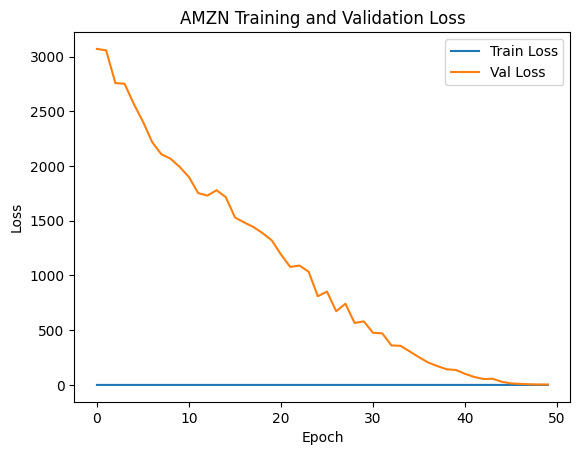

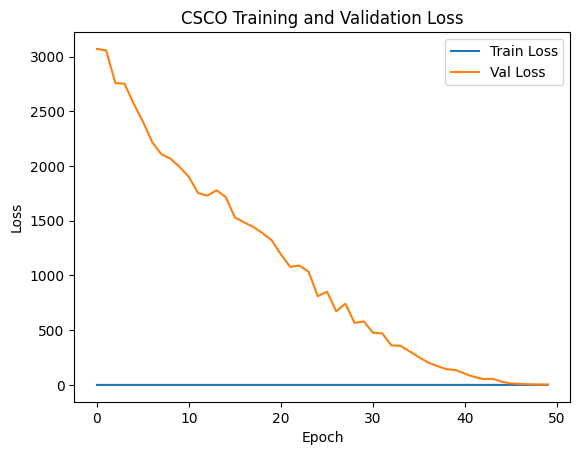

In [18]:
amzn_train_loss = history_amzn.history['loss']
amzn_val_loss = history_amzn.history['val_loss']
plt.plot(amzn_train_loss,label="Train Loss")
plt.plot(amzn_val_loss,label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("AMZN Training and Validation Loss")
plt.legend()
plt.show()

csco_train_loss = history_amzn.history['loss']
csco_val_loss = history_amzn.history['val_loss']
plt.plot(csco_train_loss,label="Train Loss")
plt.plot(csco_val_loss,label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CSCO Training and Validation Loss")
plt.legend()
plt.show()

In [19]:
# data predict
y_amzn_pred = model_amzn.predict(X_amzn_test)
y_csco_pred = model_csco.predict(X_csco_test)

# actual predicted data
y_amzn_pred_actual = scaler.inverse_transform(y_amzn_pred)
y_csco_pred_actual = scaler.inverse_transform(y_csco_pred)

24/24 [==============================] - 0s 3ms/step


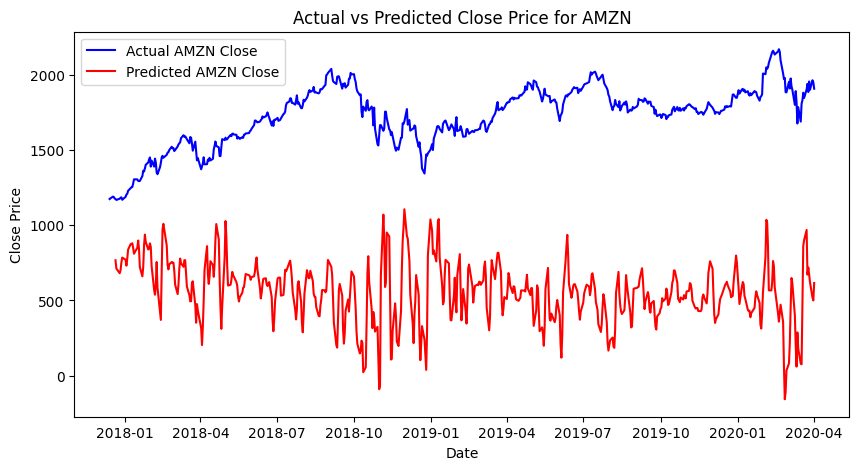

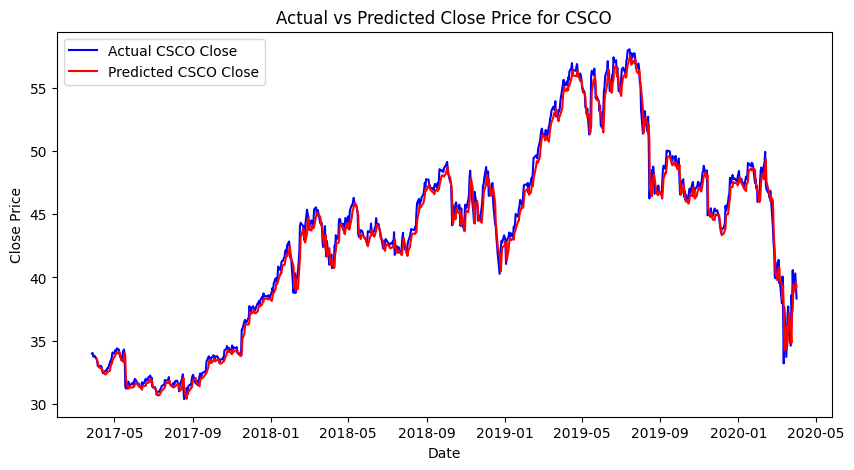

In [20]:
# plot actual vs predicted close price

plt.figure(figsize=(10, 5))
plt.plot(amzn_test.index, amzn_test['Close'], label='Actual AMZN Close', color='blue')
plt.plot(amzn_test.index[window_size:], y_amzn_pred_actual, label='Predicted AMZN Close', color='red')
plt.title('Actual vs Predicted Close Price for AMZN')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(csco_test.index, csco_test['Close'], label='Actual CSCO Close', color='blue')
plt.plot(csco_test.index[window_size:], y_csco_pred_actual, label='Predicted CSCO Close', color='red')
plt.title('Actual vs Predicted Close Price for CSCO')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [21]:
# metrics evaluation -> RMSE, MAE, MAPE
def evaluate_model(predictions, X_test, y_test):
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)
    return rmse, mae, mape

In [22]:
# evaluate model pada test set untuk AMZN dan CSCO
rmse_amzn, mae_amzn, mape_amzn = evaluate_model(y_amzn_pred, X_amzn_test, y_amzn_test)
rmse_csco, mae_csco, mape_csco = evaluate_model(y_csco_pred, X_csco_test, y_csco_test)

In [23]:
print(f'AMZN - RMSE: {rmse_amzn}, MAE: {mae_amzn}, MAPE: {mape_amzn}')
print(f'CSCO - RMSE: {rmse_csco}, MAE: {mae_csco}, MAPE: {mape_csco}')

AMZN - RMSE: 15.271182148319026, MAE: 14.77750618424608, MAPE: 0.6736441650283388
CSCO - RMSE: 0.01052596694606606, MAE: 0.0077411528603333855, MAPE: 0.014185294054033628


**AMZN (Amazon.com, Inc):**

- RMSE (Root Mean Squared Error): 15.271
> RMSE mengukur tingkat kesalahan prediksi dalam unit yang sama dengan variabel target. Semakin rendah nilainya, semakin baik model dalam melakukan prediksi. Nilai 15.271 menunjukkan bahwa rata-rata kesalahan prediksi model sekitar 15.271 dalam satuan harga saham.

- MAE (Mean Absolute Error): 14.777
> MAE mengukur rata-rata dari selisih absolut antara prediksi dan nilai sebenarnya. Semakin rendah nilainya, semakin baik model dalam melakukan prediksi. Nilai 14.777 menunjukkan bahwa rata-rata kesalahan prediksi model sekitar 14.777 dalam satuan harga saham.

- MAPE (Mean Absolute Percentage Error): 0.673%
> MAPE mengukur rata-rata dari selisih absolut dalam persentase antara prediksi dan nilai sebenarnya. Semakin rendah nilainya, semakin baik model dalam melakukan prediksi. Nilai 0.673% menunjukkan bahwa rata-rata kesalahan prediksi model sekitar 0.673% dari nilai sebenarnya.

---

**CSCO (Cisco Systems, Inc):**

- RMSE: 0.010
> Nilai RMSE yang sangat rendah seperti 0.010 menunjukkan bahwa model memiliki tingkat kesalahan prediksi yang sangat rendah, hampir mendekati nol, dalam satuan harga saham.

- MAE: 0.007
> MAE yang sangat rendah seperti 0.007 menunjukkan bahwa model memiliki tingkat kesalahan prediksi yang sangat rendah, hampir mendekati nol, dalam satuan harga saham.

- MAPE: 0.014%
> MAPE yang sangat rendah seperti 0.014% menunjukkan bahwa rata-rata kesalahan prediksi model sekitar 0.014% dari nilai sebenarnya.

---

**Interpretasi Hasil:**

- AMZN: Model memiliki RMSE dan MAE yang cukup besar, menunjukkan bahwa ada kesalahan yang cukup signifikan dalam prediksi harga saham Amazon.com, Inc. MAPE yang relatif rendah menunjukkan bahwa kesalahan tersebut tidak signifikan dalam persentase dari nilai sebenarnya.

- CSCO: Model memiliki RMSE, MAE, dan MAPE yang sangat rendah, menunjukkan bahwa model memiliki kinerja yang sangat baik dalam memprediksi harga saham Cisco Systems, Inc.

---

**Kesimpulan:**
- Evaluasi menunjukkan bahwa model untuk saham Amazon (AMZN) memiliki tingkat kesalahan yang signifikan dalam nilai RMSE dan MAE, meskipun kesalahan tersebut relatif kecil dalam persentase (MAPE).
- Sebaliknya, model untuk saham Cisco (CSCO) menunjukkan kinerja yang sangat baik dengan tingkat kesalahan yang hampir mendekati nol.

# 1C Architectural Modifications

In [24]:
# modify LSTM model
def modified_lstm_model():
    model = Sequential()
    model.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(window_size, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=64, activation='relu', return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# membuat model untuk AMZN dan CSCO
model_amzn_mod = modified_lstm_model()
model_csco_mod = modified_lstm_model()

In [25]:
# training model
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

history_amzn_mod = model_amzn_mod.fit(X_amzn_train, y_amzn_train, epochs=100, validation_data=(X_amzn_val, y_amzn_val), batch_size=32, verbose=1, callbacks=[early_stopping])
history_csco_mod = model_csco_mod.fit(X_csco_train, y_csco_train, epochs=100, validation_data=(X_csco_val, y_csco_val), batch_size=32, verbose=1, callbacks=[early_stopping])

Epoch 1/100
144/144 [==============================] - 7s 21ms/step - loss: 0.0088 - val_loss: 7671.0288
Epoch 2/100
144/144 [==============================] - 3s 20ms/step - loss: 0.0012 - val_loss: 3743.3584
Epoch 3/100
144/144 [==============================] - 2s 15ms/step - loss: 0.0010 - val_loss: 2533.0854
Epoch 4/100
144/144 [==============================] - 2s 15ms/step - loss: 9.5005e-04 - val_loss: 3096.8757
Epoch 5/100
144/144 [==============================] - 2s 15ms/step - loss: 0.0010 - val_loss: 1452.1492
Epoch 6/100
144/144 [==============================] - 2s 17ms/step - loss: 9.2763e-04 - val_loss: 1101.4283
Epoch 7/100
144/144 [==============================] - 3s 22ms/step - loss: 9.1196e-04 - val_loss: 965.4785
Epoch 8/100
144/144 [==============================] - 2s 15ms/step - loss: 7.8650e-04 - val_loss: 338.3920
Epoch 9/100
144/144 [==============================] - 2s 15ms/step - loss: 9.2097e-04 - val_loss: 296.8285
Epoch 10/100
144/144 [================

Beberapa modifikasi pada arsitektur dan hyperparameter yang dilakukan untuk memperbaiki kinerja model LSTM sebelumnya dalam memprediksi harga saham:

- Menambah Jumlah LSTM Units -> meningkatkan kemampuan model dalam menangkap pola yang lebih kompleks.

- Menambah Layer LSTM -> membantu model belajar representasi yang lebih baik dari data.

- Menambahkan Dropout Layer -> mencegah overfitting dengan mengabaikan sejumlah units selama pelatihan.

- Hyperparameter Tuning -> mengatur hyperparameter seperti learning rate, batch size, dan epoch untuk menemukan kombinasi terbaik yang memberikan performa optimal pada model.

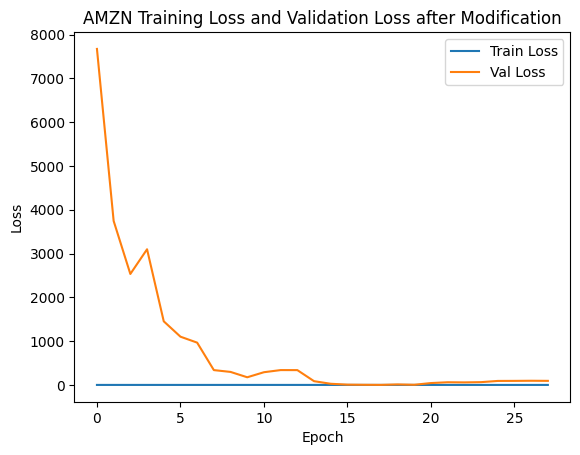

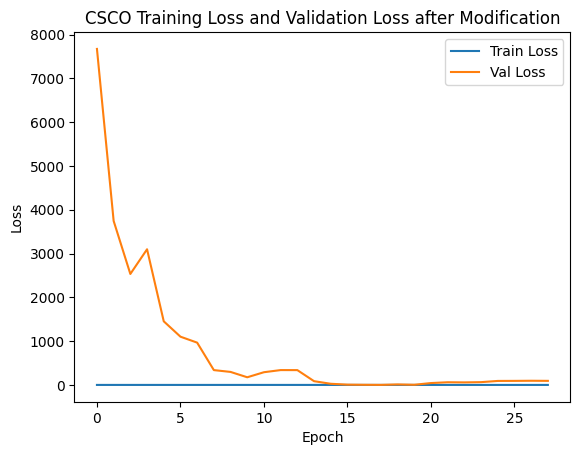

In [26]:
amzn_train_loss = history_amzn_mod.history['loss']
amzn_val_loss = history_amzn_mod.history['val_loss']
plt.plot(amzn_train_loss,label="Train Loss")
plt.plot(amzn_val_loss,label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("AMZN Training Loss and Validation Loss after Modification")
plt.legend()
plt.show()

csco_train_loss = history_amzn_mod.history['loss']
csco_val_loss = history_amzn_mod.history['val_loss']
plt.plot(csco_train_loss,label="Train Loss")
plt.plot(csco_val_loss,label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CSCO Training Loss and Validation Loss after Modification")
plt.legend()
plt.show()

In [27]:
# data predict
y_amzn_pred_mod = model_amzn_mod.predict(X_amzn_test)
y_csco_pred_mod = model_csco_mod.predict(X_csco_test)

# actual data
y_amzn_pred_actual_mod = scaler.inverse_transform(y_amzn_pred_mod)
y_csco_pred_actual_mod = scaler.inverse_transform(y_csco_pred_mod)

24/24 [==============================] - 0s 3ms/step


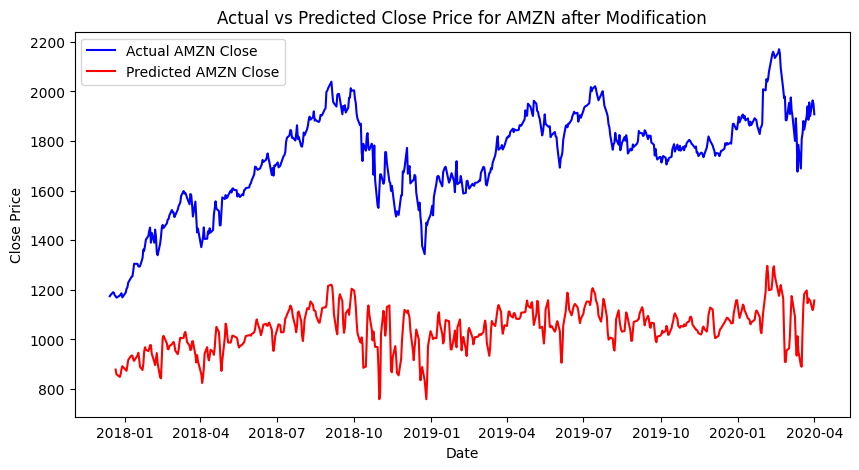

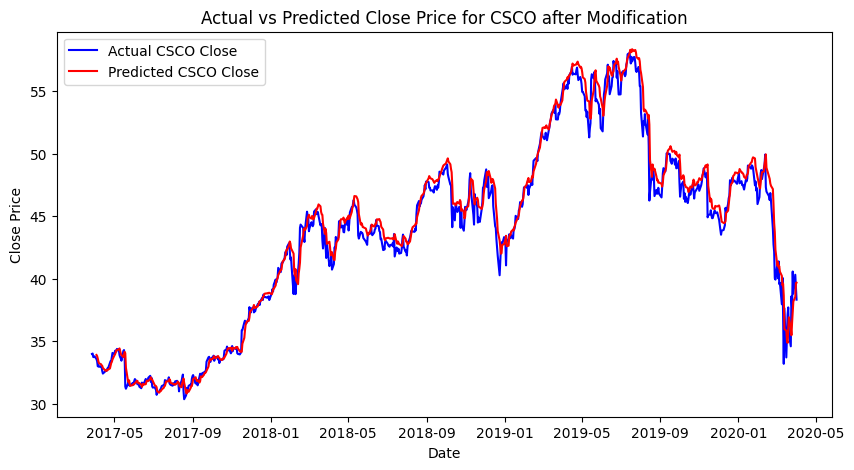

In [28]:
# plot actual vs predicted close price

plt.figure(figsize=(10, 5))
plt.plot(amzn_test.index, amzn_test['Close'], label='Actual AMZN Close', color='blue')
plt.plot(amzn_test.index[window_size:], y_amzn_pred_actual_mod, label='Predicted AMZN Close', color='red')
plt.title('Actual vs Predicted Close Price for AMZN after Modification')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(csco_test.index, csco_test['Close'], label='Actual CSCO Close', color='blue')
plt.plot(csco_test.index[window_size:], y_csco_pred_actual_mod, label='Predicted CSCO Close', color='red')
plt.title('Actual vs Predicted Close Price for CSCO after Modification')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [29]:
# evaluate model pada test set untuk AMZN dan CSCO
rmse_amzn_mod, mae_amzn_mod, mape_amzn_mod = evaluate_model(y_amzn_pred_mod, X_amzn_test, y_amzn_test)
rmse_csco_mod, mae_csco_mod, mape_csco_mod = evaluate_model(y_csco_pred_mod, X_csco_test, y_csco_test)

In [30]:
print(f'AMZN Modified - RMSE: {rmse_amzn_mod}, MAE: {mae_amzn_mod}, MAPE: {mape_amzn_mod}')
print(f'CSCO Modified - RMSE: {rmse_csco_mod}, MAE: {mae_csco_mod}, MAPE: {mape_csco_mod}')

AMZN Modified - RMSE: 8.797372104201619, MAE: 8.643468059882343, MAPE: 0.3954494895536269
CSCO Modified - RMSE: 0.012693158565432325, MAE: 0.008790998696664656, MAPE: 0.015958138194269472


# 1D Evaluation + Analysis

In [31]:
print(f"AMZN Baseline - RMSE: {rmse_amzn}, MAE: {mae_amzn}, MAPE: {mape_amzn}")
print(f"AMZN Modified - RMSE: {rmse_amzn_mod}, MAE: {mae_amzn_mod}, MAPE: {mape_amzn_mod}")
print()
print(f"CSCO Baseline - RMSE: {rmse_csco}, MAE: {mae_csco}, MAPE: {mape_csco}")
print(f"CSCO Modified - RMSE: {rmse_csco_mod}, MAE: {mae_csco_mod}, MAPE: {mape_csco_mod}")

AMZN Baseline - RMSE: 15.271182148319026, MAE: 14.77750618424608, MAPE: 0.6736441650283388
AMZN Modified - RMSE: 8.797372104201619, MAE: 8.643468059882343, MAPE: 0.3954494895536269

CSCO Baseline - RMSE: 0.01052596694606606, MAE: 0.0077411528603333855, MAPE: 0.014185294054033628
CSCO Modified - RMSE: 0.012693158565432325, MAE: 0.008790998696664656, MAPE: 0.015958138194269472


### **AMZN (Amazon.com, Inc)**

**Perbandingan Hasil Metrics Evaluation dari Model AMZN Baseline dan Modified:**
- RMSE: 15.271 -> 8.797
- MAE: 14.777 -> 8.643
- MAPE: 0.673 -> 0.395

**Analisis:**
- RMSE (Root Mean Squared Error) menurun dari 15.271 ke 8.797, menunjukkan bahwa model yang dimodifikasi memiliki kesalahan kuadrat rata-rata yang lebih kecil dibandingkan baseline.
- MAE (Mean Absolute Error) juga menurun dari 14.777 ke 8.643, menunjukkan bahwa rata-rata kesalahan absolut lebih rendah pada model yang dimodifikasi.
- MAPE (Mean Absolute Percentage Error) menurun dari 0.673 ke 0.395, menunjukkan bahwa persentase kesalahan rata-rata lebih rendah pada model yang dimodifikasi.

**Kesimpulan:**

Model yang dimodifikasi menunjukkan peningkatan kinerja yang cukup signifikan dibandingkan dengan baseline, dengan kesalahan yang lebih rendah pada ketiga metrics (RMSE, MAE, MAPE).

---

###**CSCO (Cisco Systems, Inc)**

**Perbandingan Hasil Metrics Evaluation dari Model CSCO Baseline dan Modified:**
- RMSE: 0.0105 -> 0.0127
- MAE: 0.0077 -> 0.0088
- MAPE: 0.0142 -> 0.0160

**Analisis:**
- RMSE meningkat dari 0.0105 ke 0.0127, menunjukkan bahwa model yang dimodifikasi memiliki kesalahan kuadrat rata-rata yang lebih besar dibandingkan baseline.
- MAE juga meningkat dari 0.0077 ke 0.0088, menunjukkan bahwa rata-rata kesalahan absolut lebih tinggi pada model yang dimodifikasi.
- MAPE meningkat dari 0.0142 ke 0.0160, menunjukkan bahwa persentase kesalahan rata-rata lebih tinggi pada model yang dimodifikasi.

**Kesimpulan:**

Untuk dataset CSCO, model yang dimodifikasi menunjukkan kinerja yang sedikit lebih buruk dibandingkan dengan baseline, dengan kesalahan yang lebih tinggi pada ketiga metrics (RMSE, MAE, MAPE).

---

###**Kesimpulan Umum**

Model yang dimodifikasi memberikan peningkatan kinerja yang cukup signifikan pada dataset AMZN, tetapi sedikit menurunkan kinerja pada dataset CSCO.
Peningkatan atau penurunan kinerja model dapat disebabkan oleh berbagai faktor, termasuk perbedaan dalam karakteristik data antara AMZN dan CSCO. Model yang dimodifikasi mungkin lebih kompleks dan cenderung overfit pada dataset dengan lebih banyak noise atau lebih banyak fitur yang tidak relevan. Sementara itu, model yang lebih sederhana mungkin underfit pada dataset yang memerlukan lebih banyak kompleksitas untuk menangkap pola yang mendasari. Jadi, dilihat dari hasil metrics evaluation menggunakan RMSE, MAE, dan MAPE untuk kedua arsitektur model di atas, AMZN memiliki hasil keseluruhan yang lebih bagus dan lebih cocok dengan arsitektur model yang kedua, sedangkan CSCO memiliki hasil keseluruhan yang lebih bagus dan lebih cocok dengan arsitektur model yang pertama.

# 1E Video Presentasi

Link: https://drive.google.com/drive/folders/11YjTq-A5A8KazrkfAo_pEhYbpdW6fWrs?usp=sharing